In [2]:
import opensense_data_downloader_and_transformer as oddt

In [3]:
# Instead of this we download the full 4-year dataset now direclty with the browser from
# https://data.4tu.nl/datasets/be252844-b672-471e-8d69-27269a862ec1/1

#oddt.download_overeem_2019_large_CML_data_Netherlands(local_path="data")

In [2]:
ls -lh /bg/data/CML/data/other_data/netherlands_cml_data/

total 36G
-rw-r--r-- 1 chwala-c g_bgfs_usr_chwala-c 36G Jun 15  2024 IDRawCMLdata.dat


In [3]:
!head /bg/data/CML/data/other_data/netherlands_cml_data/IDRawCMLdata.dat

YStart XStart YEnd XEnd Frequency DateTime ES SES Pmin Pmax PathLength Vendor ID
52.21836 6.925286 52.229751 6.921736 37.912 201101122315 0 0 -50 -49 1.29 NOKIA 4066
52.051263 6.61872 52.040809 6.591671 39.2525 201101122315 0 0 -56 -54 2.185 NOKIA 4048
51.980836 6.706526 51.963466 6.708112 37.94 201101122315 39 0 -48 -47 1.934 NOKIA 4051
51.958728 6.68532 51.963466 6.708112 37.9925 201101122315 0 0 -58 -57 1.648 NOKIA 4052
51.992557 6.523821 52.011968 6.588369 39.179 201101122315 0 0 -52 -50 4.918 NOKIA 4046
51.932545 6.576183 51.941893 6.617466 39.2 201101122315 0 0 -63 -59 3.015 NOKIA 4047
52.220458 6.893139 52.217718 6.891229 37.9785 201101122315 26 0 -44 -43 0.331 NOKIA 4049
51.963466 6.708112 51.980836 6.706526 39.2 201101122315 48 0 -50 -49 1.934 NOKIA 4050
52.220047 6.903828 52.196864 6.86988 37.94 201101122315 0 0 -43 -42 3.464 NOKIA 4053


# !!! Load all data !!! Do this only on a machine with 100 GB RAM !!!

In [13]:
import pandas as pd

df = pd.read_csv(
    '/bg/data/CML/data/other_data/netherlands_cml_data/IDRawCMLdata.dat',
    #nrows=1000000,
    sep=" ",
    header=0,
)

df = df.rename(columns=
    {
        'YStart': 'site_0_lat',
        'XStart': 'site_0_lon',
        'YEnd': 'site_1_lat',
        'XEnd': 'site_1_lon',
        'Frequency': 'frequency',
        'DateTime': 'time',
        'ES': 'error_seconds',
        'SES': 'sever_error_seconds',
        'Pmin': 'pmin',
        'Pmax': 'pmax',
        'PathLength': 'length',
        'ID': 'cml_id', # this is not correct since these are sublinks, but I have no time to do it correctly...
     }
)
df

,site_0_lat,site_0_lon,site_1_lat,site_1_lon,frequency,time,error_seconds,sever_error_seconds,pmin,pmax,length,Vendor,cml_id
0,52.218360,6.925286,52.229751,6.921736,37.9120,201101122315,0,0,-50.0,-49.0,1.290,NOKIA,4066
1,52.051263,6.618720,52.040809,6.591671,39.2525,201101122315,0,0,-56.0,-54.0,2.185,NOKIA,4048
2,51.980836,6.706526,51.963466,6.708112,37.9400,201101122315,39,0,-48.0,-47.0,1.934,NOKIA,4051
3,51.958728,6.685320,51.963466,6.708112,37.9925,201101122315,0,0,-58.0,-57.0,1.648,NOKIA,4052
4,51.992557,6.523821,52.011968,6.588369,39.1790,201101122315,0,0,-52.0,-50.0,4.918,NOKIA,4046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434399680,52.538198,5.775165,52.491072,5.807091,26.3795,201503152300,235,0,-46.0,-45.0,5.668,NOKIA,2811
434399681,52.526098,5.437840,52.514464,5.640832,17.5000,201503152300,0,0,-53.0,-52.0,13.795,NOKIA,2796
434399682,52.329116,5.531111,52.360275,5.501872,39.1720,201503152300,189,0,-44.0,-44.0,3.994,NOKIA,2795
434399683,52.360275,5.501872,52.329116,5.531111,37.9120,201503152300,198,0,-45.0,-44.0,3.994,NOKIA,2815


Get CML metadata from first row per CML ID

In [16]:
metadata_dict = {}
for cml_id, g in  df.groupby('cml_id'):
    metadata_dict[f'{cml_id:04d}'] = {k: g[k].values[0] for k in [
        'site_0_lat',
        'site_0_lon',
        'site_1_lat',
        'site_1_lon',
        'frequency',
        'length',
    ]
    }
metadata_dict['0002']

{'site_0_lat': np.float64(51.499885),
 'site_0_lon': np.float64(4.055869),
 'site_1_lat': np.float64(51.510914),
 'site_1_lon': np.float64(3.884575),
 'frequency': np.float64(19.095),
 'length': np.float64(11.919)}

In [214]:
len(metadata_dict)

5891

In [215]:
pd.unique(list(metadata_dict.keys()))

/tmp/ipykernel_3052918/3201228967.py:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique(list(metadata_dict.keys()))


array(['0001', '0002', '0003', ..., '5889', '5890', '5891'],
      shape=(5891,), dtype=object)

In [217]:
df_metadata = pd.DataFrame.from_dict(metadata_dict).T
df_metadata

,site_0_lat,site_0_lon,site_1_lat,site_1_lon,frequency,length
0001,52.221059,5.971825,52.216386,5.957698,39.1720,1.094
0002,51.499885,4.055869,51.510914,3.884575,19.0950,11.919
0003,51.950126,4.561332,51.958652,4.577199,39.2630,1.443
0004,53.202554,5.642414,53.185066,5.798547,14.5990,10.582
0005,52.329256,6.283044,52.360062,6.378433,22.1620,7.330
...,...,...,...,...,...,...
5887,51.603834,5.692673,51.597011,5.613026,26.3725,5.553
5888,51.686719,5.309295,51.688492,5.302698,58.2000,0.496
5889,51.496890,5.743243,51.480459,5.659188,26.3900,6.100
5890,51.568602,5.098736,51.571406,5.110323,38.0030,0.859


In [221]:
df_metadata.isnull().sum()

site_0_lat    0
site_0_lon    0
site_1_lat    0
site_1_lon    0
frequency     0
length        0
dtype: int64

In [222]:
g

,site_0_lat,site_0_lon,site_1_lat,site_1_lon,frequency,time,error_seconds,sever_error_seconds,pmin,pmax,length,Vendor,cml_id
431443936,51.601043,5.99853,51.637524,6.094724,26.418,201501221515,0,0,-47.0,-47.0,7.782,NOKIA,5891
431444439,51.601043,5.99853,51.637524,6.094724,26.418,201501221530,0,0,-47.0,-47.0,7.782,NOKIA,5891
431445185,51.601043,5.99853,51.637524,6.094724,26.418,201501221545,0,0,-47.0,-47.0,7.782,NOKIA,5891
431445827,51.601043,5.99853,51.637524,6.094724,26.418,201501221600,0,0,-47.0,-47.0,7.782,NOKIA,5891
431446640,51.601043,5.99853,51.637524,6.094724,26.418,201501221615,0,0,-47.0,-47.0,7.782,NOKIA,5891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434397509,51.601043,5.99853,51.637524,6.094724,26.418,201503152200,0,0,-48.0,-47.0,7.782,NOKIA,5891
434397801,51.601043,5.99853,51.637524,6.094724,26.418,201503152215,0,0,-48.0,-47.0,7.782,NOKIA,5891
434398182,51.601043,5.99853,51.637524,6.094724,26.418,201503152230,0,0,-48.0,-47.0,7.782,NOKIA,5891
434398712,51.601043,5.99853,51.637524,6.094724,26.418,201503152245,0,0,-48.0,-47.0,7.782,NOKIA,5891


In [249]:
ds = xr.Dataset(
    coords={
        'time': ('time', pd.to_datetime(g.time.values, format='%Y%m%d%H%M')),
        'cml_id': ('cml_id', [cml_id,]),
        'site_0_lat': ('cml_id', [g.site_0_lat.iloc[0]]),
        'site_0_lon': ('cml_id', [g.site_0_lon.iloc[0]]),
        'site_1_lat': ('cml_id', [g.site_1_lat.iloc[0]]),
        'site_1_lon': ('cml_id', [g.site_1_lon.iloc[0]]),
        'length': ('cml_id', [g.length.iloc[0]]),
        'frequency': ('cml_id', [g.frequency.iloc[0]]),
    },
    data_vars={
        'pmin': ('time', g.pmin.values.astype('float32')),
        'pmax': ('time', g.pmax.values.astype('float32')),
        'error_seconds': ('time', g.error_seconds.values.astype('uint16')),
        'sever_error_seconds': ('time', g.sever_error_seconds.values.astype('uint16')),
    }
)
ds
    

<xarray.Dataset> Size: 98kB
Dimensions:              (time: 4879, cml_id: 1)
Coordinates:
  * time                 (time) datetime64[ns] 39kB 2015-01-22T15:15:00 ... 2...
  * cml_id               (cml_id) <U4 16B '5891'
    site_0_lat           (cml_id) float64 8B 51.6
    site_0_lon           (cml_id) float64 8B 5.999
    site_1_lat           (cml_id) float64 8B 51.64
    site_1_lon           (cml_id) float64 8B 6.095
    length               (cml_id) float64 8B 7.782
    frequency            (cml_id) float64 8B 26.42
Data variables:
    pmin                 (time) float32 20kB -47.0 -47.0 -47.0 ... -48.0 -48.0
    pmax                 (time) float32 20kB -47.0 -47.0 -47.0 ... -47.0 -47.0
    error_seconds        (time) uint16 10kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    sever_error_seconds  (time) uint16 10kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

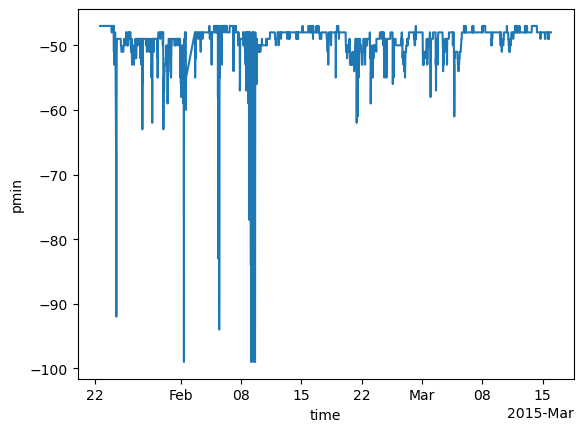

In [250]:
ds.pmin.plot()

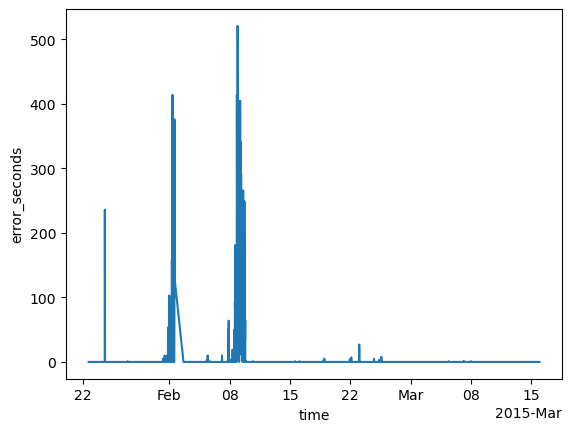

In [251]:
ds.error_seconds.plot()


In [252]:
import tqdm

In [255]:
%%time

ds_list = []

for cml_id, g in  tqdm.tqdm(df.groupby('cml_id')):
    ds = xr.Dataset(
        coords={
            'time': ('time', pd.to_datetime(g.time.values, format='%Y%m%d%H%M')),
            'cml_id': ('cml_id', [cml_id,]),
            'site_0_lat': ('cml_id', [g.site_0_lat.iloc[0]]),
            'site_0_lon': ('cml_id', [g.site_0_lon.iloc[0]]),
            'site_1_lat': ('cml_id', [g.site_1_lat.iloc[0]]),
            'site_1_lon': ('cml_id', [g.site_1_lon.iloc[0]]),
            'length': ('cml_id', [g.length.iloc[0]]),
            'frequency': ('cml_id', [g.frequency.iloc[0]]),
        },
        data_vars={
            'pmin': ('time', g.pmin.values.astype('float32')),
            'pmax': ('time', g.pmax.values.astype('float32')),
            'error_seconds': ('time', g.error_seconds.values.astype('uint16')),
            'sever_error_seconds': ('time', g.sever_error_seconds.values.astype('uint16')),
        }
    )
    ds_list.append(ds)
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5891/5891 [27:21<00:00,  3.59it/s]

CPU times: user 18min 52s, sys: 8min 36s, total: 27min 28s
Wall time: 27min 35s


In [256]:
ds_list[0]

<xarray.Dataset> Size: 2MB
Dimensions:              (time: 79625, cml_id: 1)
Coordinates:
  * time                 (time) datetime64[ns] 637kB 2011-01-12T23:30:00 ... ...
  * cml_id               (cml_id) int64 8B 1
    site_0_lat           (cml_id) float64 8B 52.22
    site_0_lon           (cml_id) float64 8B 5.972
    site_1_lat           (cml_id) float64 8B 52.22
    site_1_lon           (cml_id) float64 8B 5.958
    length               (cml_id) float64 8B 1.094
    frequency            (cml_id) float64 8B 39.17
Data variables:
    pmin                 (time) float32 318kB -58.0 -58.0 -57.5 ... -54.9 -54.9
    pmax                 (time) float32 318kB -56.9 -56.7 -56.4 ... -53.5 -53.7
    error_seconds        (time) uint16 159kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    sever_error_seconds  (time) uint16 159kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

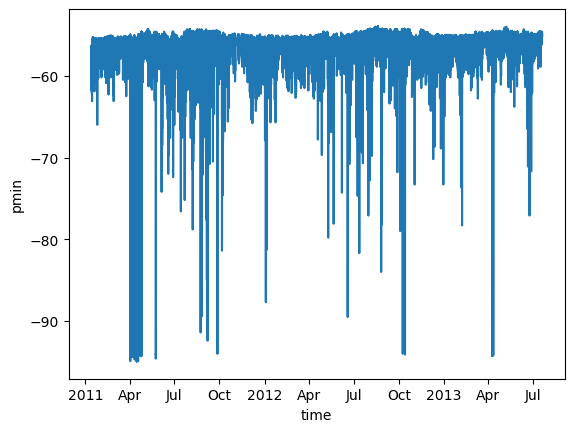

In [257]:
ds_list[0].pmin.plot()

In [259]:
ds_list[0].nbytes/1e9 * 5891

9.381747396

In [283]:
for ds in tqdm.tqdm(ds_list):
    ds.coords['cml_id_str'] = f'{ds.cml_id.data[0]:04d}'

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5891/5891 [00:02<00:00, 2507.40it/s]


In [293]:
%%time
ds_dict = {str(ds.cml_id_str.data): ds for ds in ds_list}

CPU times: user 88 ms, sys: 2.37 ms, total: 90.4 ms
Wall time: 90.6 ms


In [295]:
ds_dict['1001']

<xarray.Dataset> Size: 1MB
Dimensions:              (time: 73696, cml_id: 1)
Coordinates:
  * time                 (time) datetime64[ns] 590kB 2011-01-12T23:45:00 ... ...
  * cml_id               (cml_id) int64 8B 1001
    site_0_lat           (cml_id) float64 8B 51.58
    site_0_lon           (cml_id) float64 8B 4.967
    site_1_lat           (cml_id) float64 8B 51.56
    site_1_lon           (cml_id) float64 8B 5.012
    length               (cml_id) float64 8B 3.704
    frequency            (cml_id) float64 8B 39.26
    cml_id_str           <U4 16B '1001'
Data variables:
    pmin                 (time) float32 295kB -53.6 -53.5 -52.8 ... -52.8 -53.2
    pmax                 (time) float32 295kB -51.2 -51.2 -51.2 ... -49.9 -50.2
    error_seconds        (time) uint16 147kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    sever_error_seconds  (time) uint16 147kB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

In [296]:
dt = xr.DataTree.from_dict(ds_dict)

In [298]:
dt.nbytes/1e9

8.688417852

In [303]:
import zarr

In [305]:
%%time
fn_zarr = f'/bg/data/CML/data/other_data/netherlands_cml_data/nl_cml_2011_2015.zarr.zip'
store = zarr.storage.ZipStore(fn_zarr, mode='x')
dt.to_zarr(
    store,
    encoding={
        'pmin': {'dtype': 'int16', 'scale_factor': 0.1, '_FillValue': -9999},
        'pmax': {'dtype': 'int16', 'scale_factor': 0.1, '_FillValue': -9999},
    },
    zarr_format=2,
    mode='w',
)
store.close()

ValueError: unexpected encoding group name(s) provided: {'pmax', 'pmin'}

In [315]:
fn_zarr = '/bg/data/CML/data/other_data/netherlands_cml_data/nl_cml_2011_2015.zarr.zip'
store = zarr.storage.ZipStore(fn_zarr, mode='r')
dt_from_zarr = xr.open_datatree(store, engine='zarr')
dt_from_zarr

<xarray.DataTree>
Group: /
├── Group: /5461
│       Dimensions:              (time: 135900, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 5461
│           cml_id_str           <U4 16B ...
│         * time                 (time) datetime64[ns] 1MB 2011-01-12T23:15:00 ... 20...
│           frequency            (cml_id) float64 8B ...
│       Data variables:
│           sever_error_seconds  (time) uint16 272kB ...
│           pmin                 (time) float32 544kB ...
│           pmax                 (time) float32 544kB ...
│           error_seconds        (time) uint16 272kB ...
├── Group: /4636
│       Dimensions:              (time: 5320, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 4636
│           cml_id_str           <U4 16B ...
│         * time                 (time) datetime64[ns] 43kB 2011-01-12T23:15:00 ... 2...
│           frequency            (cml_id) float64 8B ...
│       Data variables:
│           sever_error_seconds  (time) uint16 11kB ...
│           pmin                 (time) float32 21kB ...
│           pmax                 (time) float32 21kB ...
│           error_seconds        (time) uint16 11kB ...
├── Group: /5295
│       Dimensions:              (time: 110062, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 5295
│           cml_id_str           <U4 16B ...
│         * time                 (time) datetime64[ns] 880kB 2011-01-12T23:15:00 ... ...
│           frequency            (cml_id) float64 8B ...
│       Data variables:
│           sever_error_seconds  (time) uint16 220kB ...
│           pmin                 (time) float32 440kB ...
│           pmax                 (time) float32 440kB ...
│           error_seconds        (time) uint16 220kB ...
...
├── Group: /1256
│       Dimensions:              (time: 62275, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 1256
│           cml_id_str           <U4 16B ...
│         * time                 (time) datetime64[ns] 498kB 2011-01-13 ... 2013-11-1...
│           frequency            (cml_id) float64 8B ...
│       Data variables:
│           sever_error_seconds  (time) uint16 125kB ...
│           pmin                 (time) float32 249kB ...
│           pmax                 (time) float32 249kB ...
│           error_seconds        (time) uint16 125kB ...
├── Group: /0088
│       Dimensions:              (time: 72944, cml_id: 1)
│       Coordinates:
│           site_0_lat           (cml_id) float64 8B ...
│           length               (cml_id) float64 8B ...
│           site_0_lon           (cml_id) float64 8B ...
│           site_1_lat           (cml_id) float64 8B ...
│           site_1_lon           (cml_id) float64 8B ...
│         * cml_id               (cml_id) int64 8B 88
│        

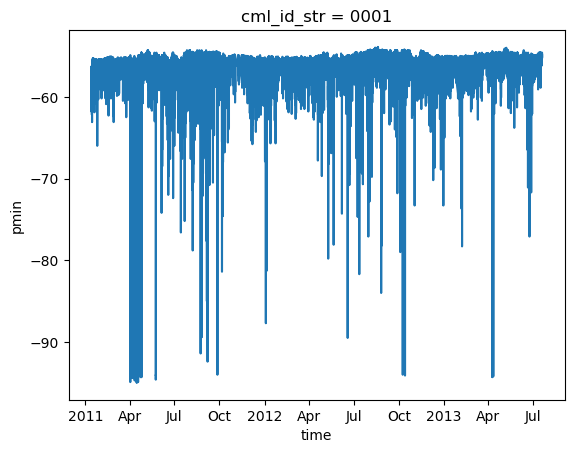

In [312]:
dt_from_zarr.pmin.plot()

In [207]:
import tqdm

In [209]:
import numpy as np

atol = 0.001

cml_sublink_id_pairs = []

for cml_id, metadata in tqdm.tqdm(list(metadata_dict.items())):
    for cml_id_other, metadata_other in metadata_dict.items():
        if cml_id == cml_id_other:
            continue
        if (
            # np.isclose(metadata['site_0_lat'], metadata_other['site_1_lat'], atol=atol) &
            # np.isclose(metadata['site_0_lon'], metadata_other['site_1_lon'], atol=atol) &
            # np.isclose(metadata['site_1_lat'], metadata_other['site_0_lat'], atol=atol) &
            # np.isclose(metadata['site_1_lon'], metadata_other['site_0_lon'], atol=atol)
            (metadata['site_0_lat'] == metadata_other['site_1_lat']) &
            (metadata['site_0_lon'] == metadata_other['site_1_lon']) &
            (metadata['site_1_lat'] == metadata_other['site_0_lat']) &
            (metadata['site_1_lon'] == metadata_other['site_0_lon'])
        ):
            cml_sublink_id_pairs.append((cml_id, cml_id_other))
            

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5891/5891 [00:13<00:00, 445.28it/s]


5891

In [202]:
len(cml_sublink_id_pairs)

5276

In [35]:
cml_sublink_id_pairs[:50]

[('0001', '0052'),
 ('0002', '0929'),
 ('0003', '0030'),
 ('0004', '1152'),
 ('0005', '1777'),
 ('0006', '1659'),
 ('0007', '0380'),
 ('0008', '0129'),
 ('0009', '0358'),
 ('0010', '1595'),
 ('0011', '0246'),
 ('0012', '0033'),
 ('0013', '0964'),
 ('0014', '0870'),
 ('0015', '1418'),
 ('0016', '0729'),
 ('0017', '0841'),
 ('0018', '0782'),
 ('0019', '0840'),
 ('0020', '0036'),
 ('0021', '1586'),
 ('0022', '0786'),
 ('0023', '0045'),
 ('0024', '0708'),
 ('0025', '0050'),
 ('0026', '0037'),
 ('0027', '1745'),
 ('0029', '1644'),
 ('0030', '0003'),
 ('0031', '0421'),
 ('0032', '0914'),
 ('0033', '0012'),
 ('0034', '1408'),
 ('0035', '2164'),
 ('0036', '0020'),
 ('0037', '0026'),
 ('0038', '1007'),
 ('0039', '1116'),
 ('0040', '0051'),
 ('0041', '1193'),
 ('0042', '0261'),
 ('0043', '1245'),
 ('0044', '1489'),
 ('0045', '0023'),
 ('0046', '1510'),
 ('0047', '0293'),
 ('0048', '0594'),
 ('0049', '1333'),
 ('0050', '0025'),
 ('0051', '0040')]

In [40]:
id_0 = [item[0] for item in cml_sublink_id_pairs]
id_1 = [item[1] for item in cml_sublink_id_pairs]

print(len(id_0))
print(len(id_1))

5276
5276


In [41]:
print(len(set(id_0)))
print(len(set(id_1)))

5276
5276


In [45]:
set(id_0) - set(id_1)

set()

In [67]:
df_small = df[:1000000]
df_small

,site_0_lat,site_0_lon,site_1_lat,site_1_lon,frequency,time,error_seconds,sever_error_seconds,pmin,pmax,length,Vendor,cml_id
0,52.218360,6.925286,52.229751,6.921736,37.9120,201101122315,0,0,-50.0,-49.0,1.290,NOKIA,4066
1,52.051263,6.618720,52.040809,6.591671,39.2525,201101122315,0,0,-56.0,-54.0,2.185,NOKIA,4048
2,51.980836,6.706526,51.963466,6.708112,37.9400,201101122315,39,0,-48.0,-47.0,1.934,NOKIA,4051
3,51.958728,6.685320,51.963466,6.708112,37.9925,201101122315,0,0,-58.0,-57.0,1.648,NOKIA,4052
4,51.992557,6.523821,52.011968,6.588369,39.1790,201101122315,0,0,-52.0,-50.0,4.918,NOKIA,4046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,51.865358,4.223562,51.881089,4.263222,26.3830,201101150345,0,0,-49.4,-48.3,3.236,NEC,1026
999996,52.268097,5.581889,52.235425,5.474368,23.1700,201101150345,0,0,-48.4,-47.4,8.171,NEC,1027
999997,51.561011,5.454443,51.622732,5.506799,23.1700,201101150345,0,0,-50.0,-48.0,7.758,NEC,1028
999998,51.585367,4.812388,51.566676,4.873029,26.0820,201101150345,0,0,-50.3,-48.7,4.678,NEC,1029


In [68]:
foo = df_small.set_index([pd.to_datetime(df_small.time, format='%Y%m%d%H%M'), df_small.cml_id])
foo

site_0_lat  site_0_lon  site_1_lat  site_1_lon  \
time                cml_id                                                   
2011-01-12 23:15:00 4066     52.218360    6.925286   52.229751    6.921736   
                    4048     52.051263    6.618720   52.040809    6.591671   
                    4051     51.980836    6.706526   51.963466    6.708112   
                    4052     51.958728    6.685320   51.963466    6.708112   
                    4046     51.992557    6.523821   52.011968    6.588369   
...                                ...         ...         ...         ...   
2011-01-15 03:45:00 1026     51.865358    4.223562   51.881089    4.263222   
                    1027     52.268097    5.581889   52.235425    5.474368   
                    1028     51.561011    5.454443   51.622732    5.506799   
                    1029     51.585367    4.812388   51.566676    4.873029   
                    1030     52.083815    4.900458   52.076350    4.894117   

                            frequency          time  error_seconds  \
time                cml_id                                           
2011-01-12 23:15:00 4066      37.9120  201101122315              0   
                    4048      39.2525  201101122315              0   
                    4051      37.9400  201101122315             39   
                    4052      37.9925  201101122315              0   
                    4046      39.1790  201101122315              0   
...                               ...           ...            ...   
2011-01-15 03:45:00 1026      26.3830  201101150345              0   
                    1027      23.1700  201101150345              0   
                    1028      23.1700  201101150345              0   
                    1029      26.0820  201101150345              0   
                    1030      39.1720  201101150345              0   

                            sever_error_seconds  pmin  pmax  length Vendor  \
time                cml_id                                                   
2011-01-12 23:15:00 4066                      0 -50.0 -49.0   1.290  NOKIA   
                    4048                      0 -56.0 -54.0   2.185  NOKIA   
                    4051                      0 -48.0 -47.0   1.934  NOKIA   
                    4052                      0 -58.0 -57.0   1.648  NOKIA   
                    4046                      0 -52.0 -50.0   4.918  NOKIA   
...                                         ...   ...   ...     ...    ...   
2011-01-15 03:45:00 1026                      0 -49.4 -48.3   3.236    NEC   
                    1027                      0 -48.4 -47.4   8.171    NEC   
                    1028                      0 -50.0 -48.0   7.758    NEC   
                    1029                      0 -50.3 -48.7   4.678    NEC   
                    1030                      0 -54.1 -53.5   0.936    NEC   

                            cml_id  
time                cml_id          
2011-01-12 23:15:00 4066      4066  
                    4048      4048  
                    4051      4051  
                    4052      4052  
                    4046      4046  
...                            ...  
2011-01-15 03:45:00 1026      1026  
                    1027      1027  
                    1028      1028  
                    1029      1029  
                    1030      1030  

[1000000 rows x 13 columns]

In [69]:
foo.drop_duplicates(['time', 'cml_id'])

site_0_lat  site_0_lon  site_1_lat  site_1_lon  \
time                cml_id                                                   
2011-01-12 23:15:00 4066     52.218360    6.925286   52.229751    6.921736   
                    4048     52.051263    6.618720   52.040809    6.591671   
                    4051     51.980836    6.706526   51.963466    6.708112   
                    4052     51.958728    6.685320   51.963466    6.708112   
                    4046     51.992557    6.523821   52.011968    6.588369   
...                                ...         ...         ...         ...   
2011-01-15 03:45:00 1025     52.008431    4.979719   52.009957    5.053610   
                    1027     52.268097    5.581889   52.235425    5.474368   
                    1028     51.561011    5.454443   51.622732    5.506799   
                    1029     51.585367    4.812388   51.566676    4.873029   
                    1030     52.083815    4.900458   52.076350    4.894117   

                            frequency          time  error_seconds  \
time                cml_id                                           
2011-01-12 23:15:00 4066      37.9120  201101122315              0   
                    4048      39.2525  201101122315              0   
                    4051      37.9400  201101122315             39   
                    4052      37.9925  201101122315              0   
                    4046      39.1790  201101122315              0   
...                               ...           ...            ...   
2011-01-15 03:45:00 1025      26.3830  201101150345              0   
                    1027      23.1700  201101150345              0   
                    1028      23.1700  201101150345              0   
                    1029      26.0820  201101150345              0   
                    1030      39.1720  201101150345              0   

                            sever_error_seconds  pmin  pmax  length Vendor  \
time                cml_id                                                   
2011-01-12 23:15:00 4066                      0 -50.0 -49.0   1.290  NOKIA   
                    4048                      0 -56.0 -54.0   2.185  NOKIA   
                    4051                      0 -48.0 -47.0   1.934  NOKIA   
                    4052                      0 -58.0 -57.0   1.648  NOKIA   
                    4046                      0 -52.0 -50.0   4.918  NOKIA   
...                                         ...   ...   ...     ...    ...   
2011-01-15 03:45:00 1025                      0 -55.4 -54.3   5.060    NEC   
                    1027                      0 -48.4 -47.4   8.171    NEC   
                    1028                      0 -50.0 -48.0   7.758    NEC   
                    1029                      0 -50.3 -48.7   4.678    NEC   
                    1030                      0 -54.1 -53.5   0.936    NEC   

                            cml_id  
time                cml_id          
2011-01-12 23:15:00 4066      4066  
                    4048      4048  
                    4051      4051  
                    4052      4052  
                    4046      4046  
...                            ...  
2011-01-15 03:45:00 1025      1025  
                    1027      1027  
                    1028      1028  
                    1029      1029  
                    1030      1030  

[980814 rows x 13 columns]

In [196]:
pd.unique(foo.cml_id)

array([4066, 4048, 4051, ..., 2718, 4866, 1813], shape=(5284,))

In [ ]:
cml_id

In [91]:
cml_sublink_id_pairs[:5]

[('0001', '0052'),
 ('0002', '0929'),
 ('0003', '0030'),
 ('0004', '1152'),
 ('0005', '1777')]

In [138]:
cml_id_dict = {}
sublink_0_names = []
sublink_1_names = []
for cml_sublink_id_pair in cml_sublink_id_pairs:
    if cml_id_dict in list(cml_id_dict.keys()):
        continue
    cml_id_dict[cml_sublink_id_pair[0]] = {
        'sublink_name_0': cml_sublink_id_pair[0],
        'sublink_name_1': cml_sublink_id_pair[1],
    }
    
    if cml_sublink_id_pair[0] in sublink_0_names:
        continue
    if cml_sublink_id_pair[1] in sublink_0_names:
        continue
    sublink_0_names.append(cml_sublink_id_pair[0])
    sublink_1_names.append(cml_sublink_id_pair[1])

In [160]:
cml_id_dict = {}
sublink_0_names = []
sublink_1_names = []

for cml_sublink_id_pair in cml_sublink_id_pairs:
    if cml_sublink_id_pair[1] not in sublink_0_names:
        cml_id = cml_sublink_id_pair[0]
        sublink_id = '0'
        sublink_0_names.append(cml_sublink_id_pair[0])
    else:
        cml_id = cml_sublink_id_pair[1]
        sublink_id = '1'
    
    cml_id_dict[cml_sublink_id_pair[0]]= {
        'cml_id': cml_id,
        'sublink_id': sublink_id
    }



In [168]:
cml_id_dict['3513']

{'cml_id': '3499', 'sublink_id': '1'}

In [158]:
len(sublink_1_names)

5276

In [139]:
len(sublink_0_names)

2638

In [140]:
len(cml_sublink_id_pairs)/2

2638.0

In [104]:
import xarray as xr

In [133]:
ds_foo = xr.Dataset.from_dataframe(foo.drop_duplicates(['time', 'cml_id']).loc[:, ['pmin', 'pmax']])

In [134]:
ds_foo

<xarray.Dataset> Size: 18MB
Dimensions:  (time: 211, cml_id: 5284)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2011-01-12T23:15:00 ... 2011-01-15T03:...
  * cml_id   (cml_id) int64 42kB 1 2 3 4 5 6 7 ... 5747 5748 5749 5750 5751 5752
Data variables:
    pmin     (time, cml_id) float64 9MB nan nan nan nan nan ... nan nan nan nan
    pmax     (time, cml_id) float64 9MB nan nan nan nan nan ... nan nan nan nan

In [135]:
ds_foo = ds_foo.rename_dims({'cml_id': 'original_cml_id'})
ds_foo = ds_foo.rename_vars({'cml_id': 'original_cml_id'})

In [136]:
ds_foo

<xarray.Dataset> Size: 18MB
Dimensions:          (time: 211, original_cml_id: 5284)
Coordinates:
  * time             (time) datetime64[ns] 2kB 2011-01-12T23:15:00 ... 2011-0...
  * original_cml_id  (original_cml_id) int64 42kB 1 2 3 4 ... 5750 5751 5752
Data variables:
    pmin             (time, original_cml_id) float64 9MB nan nan nan ... nan nan
    pmax             (time, original_cml_id) float64 9MB nan nan nan ... nan nan

In [174]:
df_cml_id_sublink_id = pd.DataFrame.from_dict(cml_id_dict).T
df_cml_id_sublink_id

,cml_id,sublink_id
0001,0001,0
0002,0002,0
0003,0003,0
0004,0004,0
0005,0005,0
...,...,...
5885,5022,1
5886,5109,1
5887,3343,1
5888,5585,1


In [176]:
(df_cml_id_sublink_id.sublink_id == '0').sum()

np.int64(2638)

In [177]:
(df_cml_id_sublink_id.sublink_id == '1').sum()

np.int64(2638)

In [183]:
ds_foo['cml_id'] = df_cml_id_sublink_id.cml_id.values
ds_foo['sublink_id'] = df_cml_id_sublink_id.sublink_id.values
ds_foo

<xarray.Dataset> Size: 18MB
Dimensions:          (time: 211, original_cml_id: 5284, cml_id: 5276,
                      sublink_id: 5276)
Coordinates:
  * time             (time) datetime64[ns] 2kB 2011-01-12T23:15:00 ... 2011-0...
  * original_cml_id  (original_cml_id) int64 42kB 1 2 3 4 ... 5750 5751 5752
  * cml_id           (cml_id) object 42kB '0001' '0002' '0003' ... '5585' '5623'
  * sublink_id       (sublink_id) object 42kB '0' '0' '0' '0' ... '1' '1' '1'
Data variables:
    pmin             (time, original_cml_id) float64 9MB nan nan nan ... nan nan
    pmax             (time, original_cml_id) float64 9MB nan nan nan ... nan nan

5276

In [9]:
g.iloc[0, :]

site_0_lat                52.856064
site_0_lon                 5.889313
site_1_lat                52.822543
site_1_lon                 5.967407
frequency                     26.39
time                   201101140745
error_seconds                     0
sever_error_seconds               0
pmin                         -120.0
pmax                          -46.0
length                        6.435
Vendor                        NOKIA
cml_id                         5752
Name: 637064, dtype: object

In [11]:
pd.to_datetime(g.time, format='%Y%m%d%H%M')

637064   2011-01-14 07:45:00
640432   2011-01-14 08:00:00
646841   2011-01-14 08:15:00
651527   2011-01-14 08:30:00
656285   2011-01-14 08:45:00
659476   2011-01-14 09:00:00
666071   2011-01-14 09:15:00
672505   2011-01-14 09:30:00
678602   2011-01-14 09:45:00
682351   2011-01-14 10:00:00
709973   2011-01-14 11:15:00
714954   2011-01-14 11:30:00
721234   2011-01-14 11:45:00
726542   2011-01-14 12:00:00
730507   2011-01-14 12:15:00
736999   2011-01-14 12:30:00
742280   2011-01-14 12:45:00
747369   2011-01-14 13:00:00
749821   2011-01-14 13:15:00
756819   2011-01-14 13:30:00
783330   2011-01-14 14:45:00
789421   2011-01-14 15:00:00
794745   2011-01-14 15:15:00
800054   2011-01-14 15:30:00
802427   2011-01-14 15:45:00
807962   2011-01-14 16:00:00
812242   2011-01-14 16:15:00
816112   2011-01-14 16:30:00
819885   2011-01-14 16:45:00
822649   2011-01-14 17:00:00
838075   2011-01-14 18:15:00
841558   2011-01-14 18:30:00
845476   2011-01-14 18:45:00
847933   2011-01-14 19:00:00
853436   2011-

In [12]:
dict(g.dtypes)

{'site_0_lat': dtype('float64'),
 'site_0_lon': dtype('float64'),
 'site_1_lat': dtype('float64'),
 'site_1_lon': dtype('float64'),
 'frequency': dtype('float64'),
 'time': dtype('int64'),
 'error_seconds': dtype('int64'),
 'sever_error_seconds': dtype('int64'),
 'pmin': dtype('float64'),
 'pmax': dtype('float64'),
 'length': dtype('float64'),
 'Vendor': dtype('O'),
 'cml_id': dtype('int64')}

## use dask.Dataframe

In [23]:
import dask.dataframe as dd

dtypes = {
    'YStart': 'float64',
    'XStart': 'float64',
    'YEnd': 'float64',
    'XEnd': 'float64',
    'Frequency': 'float64',
    'DateTime': 'int64',
    'ES': 'int64',
    'SES': 'int64',
    'Pmin': 'float64',
    'Pmax': 'float64',
    'PathLength': 'float64',
    'Vendor': 'O',
    'ID': 'int64'
}

df = dd.read_csv(
    'data/IDRawCMLdata.dat',
    sep=" ",
    header=0,
    blocksize='100MB',
    dtype=dtypes,
)
df

,YStart,XStart,YEnd,XEnd,Frequency,DateTime,ES,SES,Pmin,Pmax,PathLength,Vendor,ID
npartitions=378,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,string,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
